In [189]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

In [190]:
df =pd.read_csv("/Users/da-m1-40/Downloads/Final_Market.csv")
df

Unnamed: 0               Province Container Size_Grade  Weight_Kg  \
0               0                   CAPE     EC120         1L       12.0   
1               1                   CAPE     M4183         1L       18.3   
2               2                GAUTENG     AT200         1L       20.0   
3               3              TRANSVAAL     BJ090         1L        9.0   
4               4      WESTERN FREESTATE     PP100         1R       10.0   
...           ...                    ...       ...        ...        ...   
64371       64371              TRANSVAAL     AG100         1M       10.0   
64372       64372  IMPORTS - OUTSIDE RSA     BC180          X       18.0   
64373       64373              TRANSVAAL     TS035         1M        3.5   
64374       64374                  NATAL     BJ100         2M       10.0   
64375       64375                   CAPE     M4183         1L       18.3   

                  Commodities        Date  Low_Price  High_Price  Sales_Total  \
0          APPLE GRANNY SMITH  2020/03/10      108.0       112.0       3236.0   
1      APPLE GOLDEN DELICIOUS  2020/09/09      150.0       170.0      51710.0   
2           AVOCADO PINKERTON  2020/05/05       70.0        80.0       4860.0   
3          TOMATOES-LONG LIFE  2020/01/20       60.0        60.0        600.0   
4       POTATO SIFRA (WASHED)  2020/07/14       40.0        45.0      41530.0   
...                       ...         ...        ...         ...          ...   
64371             ONIONS MILD  2020/05/18       70.0        75.0      19695.0   
64372                  BANANA  2020/02/05      160.0       220.0      13560.0   
64373      TOMATOES-LONG LIFE  2020/08/20       20.0        20.0       6000.0   
64374                   LEMON  2020/08/18       50.0        80.0      16730.0   
64375              APPLE FUJI  2020/08/06      150.0       150.0        150.0   

       Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand avg_price_per_kg  year  \
0                  29          348.0              0              9.3  2020   
1                 332         6075.6            822             8.51  2020   
2                  66         1320.0             50             3.68  2020   
3                  10           90.0              0             6.67  2020   
4                 927         9270.0            393             4.48  2020   
...               ...            ...            ...              ...   ...   
64371             281         2810.0           3583             7.01  2020   
64372              72         1296.0            887            10.46  2020   
64373             300         1050.0            900             5.71  2020   
64374             277         2770.0            372             6.04  2020   
64375               1           18.3              1              8.2  2020   

       month  day Selling_Price  
0          3   10   111.5862069  
1          9    9    155.753012  
2          5    5   73.63636364  
3          1   20            60  
4          7   14    44.8004315  
...      ...  ...           ...  
64371      5   18   70.08896797  
64372      2    5   188.3333333  
64373      8   20            20  
64374      8   18   60.39711191  
64375      8    6           150  

[64376 rows x 18 columns]

In [191]:
df.isnull().sum()

Unnamed: 0          0
Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
year                0
month               0
day                 0
Selling_Price       0
dtype: int64

In [192]:
df1 = df[df['Commodities'] == 'TOMATOES-LONG LIFE']
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3849 entries, 3 to 64373
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3849 non-null   int64  
 1   Province          3849 non-null   object 
 2   Container         3849 non-null   object 
 3   Size_Grade        3849 non-null   object 
 4   Weight_Kg         3849 non-null   float64
 5   Commodities       3849 non-null   object 
 6   Date              3849 non-null   object 
 7   Low_Price         3849 non-null   float64
 8   High_Price        3849 non-null   float64
 9   Sales_Total       3849 non-null   float64
 10  Total_Qty_Sold    3849 non-null   int64  
 11  Total_Kg_Sold     3849 non-null   float64
 12  Stock_On_Hand     3849 non-null   int64  
 13  avg_price_per_kg  3849 non-null   object 
 14  year              3849 non-null   int64  
 15  month             3849 non-null   int64  
 16  day               3849 non-null   int64  
 17 

In [193]:
df1['avg_price_per_kg'] = pd.to_numeric(df1['avg_price_per_kg'], errors='coerce')

df1['Selling_Price'] = pd.to_numeric(df1['Selling_Price'], errors='coerce')



/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_9151/2080939562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['avg_price_per_kg'] = pd.to_numeric(df1['avg_price_per_kg'], errors='coerce')
/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_9151/2080939562.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Selling_Price'] = pd.to_numeric(df1['Selling_Price'], errors='coerce')


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        64376 non-null  int64  
 1   Province          64376 non-null  object 
 2   Container         64376 non-null  object 
 3   Size_Grade        64376 non-null  object 
 4   Weight_Kg         64376 non-null  float64
 5   Commodities       64376 non-null  object 
 6   Date              64376 non-null  object 
 7   Low_Price         64376 non-null  float64
 8   High_Price        64376 non-null  float64
 9   Sales_Total       64376 non-null  float64
 10  Total_Qty_Sold    64376 non-null  int64  
 11  Total_Kg_Sold     64376 non-null  float64
 12  Stock_On_Hand     64376 non-null  int64  
 13  avg_price_per_kg  64376 non-null  object 
 14  year              64376 non-null  int64  
 15  month             64376 non-null  int64  
 16  day               64376 non-null  int64 

In [195]:
province_sales = df1.groupby('Province')['Sales_Total'].sum()
bottom_provinces = province_sales.sort_values().head(5)
bottom_provinces

Province
GAUTENG            10620.0
NATAL             372835.0
KWAZULU NATAL     457082.0
MPUMALANGA       1293185.0
CAPE             2813218.0
Name: Sales_Total, dtype: float64

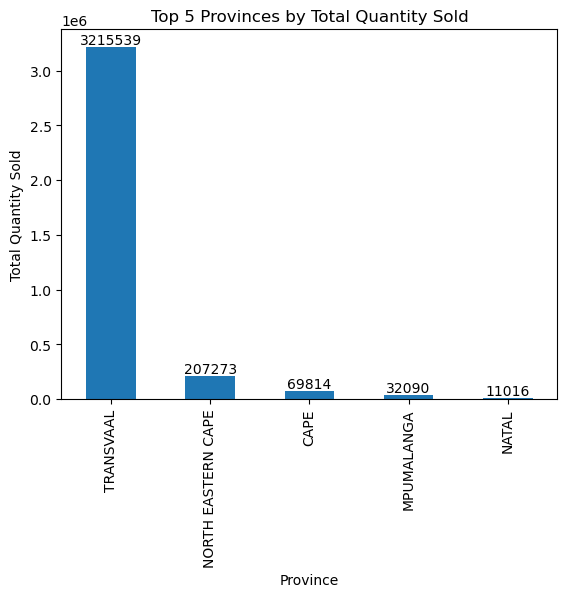

In [196]:
import matplotlib.pyplot as plt

top_provinces_sales = df1.groupby('Province')['Total_Qty_Sold'].sum().nlargest(5)
top_provinces_sales.plot(kind='bar', title='Top 5 Provinces by Total Quantity Sold', ylabel='Total Quantity Sold')

# Adding labels to the bars
for i, value in enumerate(top_provinces_sales):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()


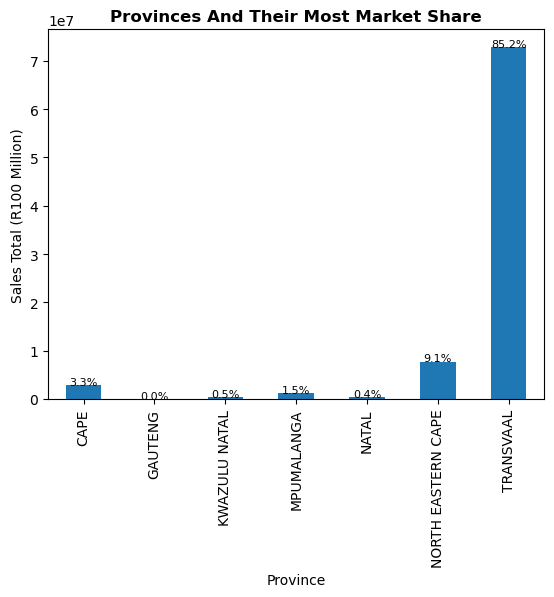

In [197]:
province_sales=df1.groupby('Province')['Sales_Total'].sum()
total_sales_all_provinces=df1["Sales_Total"].sum()
percent=(province_sales/total_sales_all_provinces)*100
province_sales.plot(kind='bar',width=0.5)
plt.xlabel("Province")
plt.ylabel("Sales Total (R100 Million)")
plt.title('Provinces And Their Most Market Share', fontweight='bold')
for i, (value, percentage) in enumerate(zip(province_sales, percent)):
    plt.text(i, value + 10, f"{percentage:.1f}%", ha='center', fontsize=8)
plt.show()

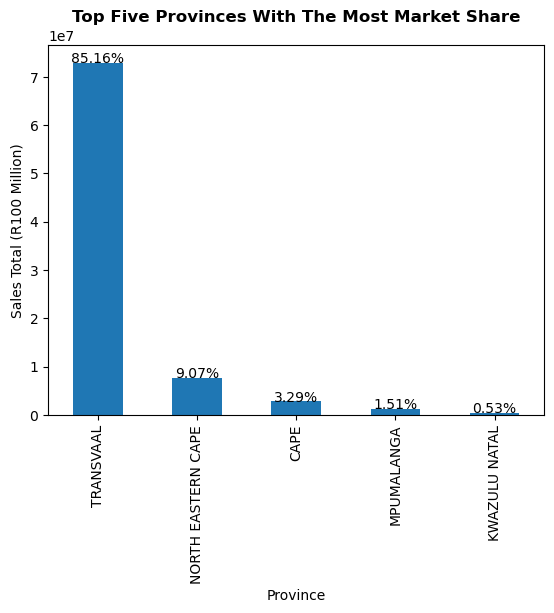

In [198]:
province_sales=df1.groupby('Province')['Sales_Total'].sum()
total_sales_all_provinces=df1["Sales_Total"].sum()
topFive=province_sales.nlargest(5)
percent=(topFive/total_sales_all_provinces)*100
topFive.plot(kind='bar')
plt.xlabel("Province")
plt.ylabel("Sales Total (R100 Million)")
plt.title('Top Five Provinces With The Most Market Share', fontweight='bold')
for i, v in enumerate(topFive):
    plt.text(i, v + 10, f"{percent[topFive.index[i]]:.2f}%", ha='center')
plt.show()

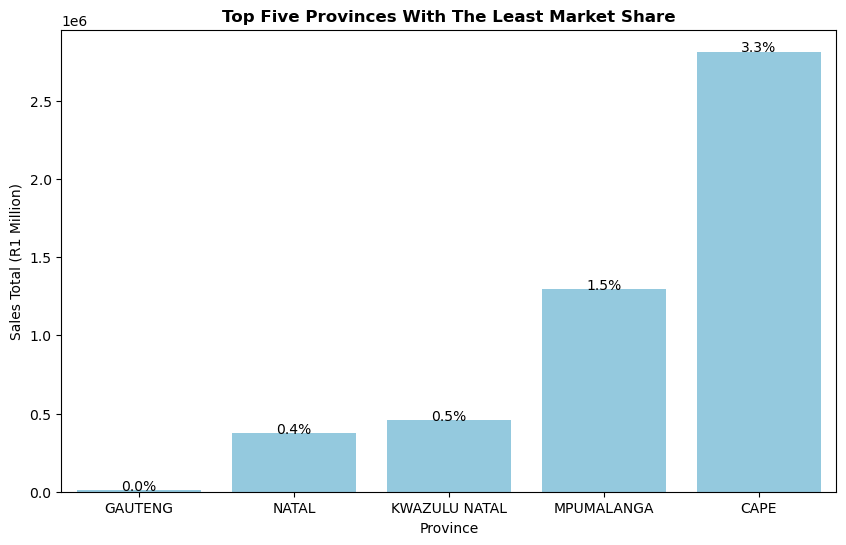

In [199]:
province_sales=df1.groupby('Province')['Sales_Total'].sum()
total_sales_all_provinces=df1["Sales_Total"].sum()
topFive=province_sales.nsmallest(5)
percent=(topFive/total_sales_all_provinces)*100
plt.figure(figsize=(10,6))
sns.barplot(x=topFive.index, y=topFive.values,color='skyblue')
plt.xlabel("Province")
plt.ylabel("Sales Total (R1 Million)")
plt.title('Top Five Provinces With The Least Market Share', fontweight='bold')
for i, v in enumerate(topFive):
    plt.text(i, v + 10, f"{percent[topFive.index[i]]:.1f}%", ha='center')
plt.show()

In [200]:
df1

Unnamed: 0            Province Container Size_Grade  Weight_Kg  \
3               3           TRANSVAAL     BJ090         1L        9.0   
5               5           TRANSVAAL     AP010         2M        1.0   
52             52  NORTH EASTERN CAPE     BM050         1L        5.0   
64             64           TRANSVAAL     KR200         4M       20.0   
89             89           TRANSVAAL     KR200         2M       20.0   
...           ...                 ...       ...        ...        ...   
64302       64302       KWAZULU NATAL     KR200         1R       20.0   
64346       64346           TRANSVAAL     AP010         1R        1.0   
64358       64358           TRANSVAAL     NP005         2S        0.5   
64365       64365           TRANSVAAL     BS060         3Z        6.0   
64373       64373           TRANSVAAL     TS035         1M        3.5   

              Commodities        Date  Low_Price  High_Price  Sales_Total  \
3      TOMATOES-LONG LIFE  2020/01/20       60.0        60.0        600.0   
5      TOMATOES-LONG LIFE  2020/02/03        8.0        14.0      82576.0   
52     TOMATOES-LONG LIFE  2020/02/14       35.0        50.0      15970.0   
64     TOMATOES-LONG LIFE  2020/04/29      120.0       120.0        480.0   
89     TOMATOES-LONG LIFE  2020/07/10      140.0       140.0       3780.0   
...                   ...         ...        ...         ...          ...   
64302  TOMATOES-LONG LIFE  2020/09/19      115.0       115.0       5750.0   
64346  TOMATOES-LONG LIFE  2020/03/14        7.0        12.0      46640.0   
64358  TOMATOES-LONG LIFE  2019/12/14        5.0        10.0       5460.0   
64365  TOMATOES-LONG LIFE  2020/01/08       30.0        35.0      16570.0   
64373  TOMATOES-LONG LIFE  2020/08/20       20.0        20.0       6000.0   

       Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  year  \
3                  10           90.0              0              6.67  2020   
5                8064         8064.0            485             10.24  2020   
52                453         2265.0            297              7.05  2020   
64                  4           80.0             76              6.00  2020   
89                 27          540.0              0              7.00  2020   
...               ...            ...            ...               ...   ...   
64302              50         1000.0              0              5.75  2020   
64346            5500         5500.0            660              8.48  2020   
64358            1080          540.0              0             10.11  2019   
64365             518         3108.0            332              5.33  2020   
64373             300         1050.0            900              5.71  2020   

       month  day  Selling_Price  
3          1   20      60.000000  
5          2    3      10.240079  
52         2   14      35.253863  
64         4   29     120.000000  
89         7   10     140.000000  
...      ...  ...            ...  
64302      9   19     115.000000  
64346      3   14       8.480000  
64358     12   14       5.055556  
64365      1    8      31.988417  
64373      8   20      20.000000  

[3849 rows x 18 columns]

In [201]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [202]:
# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for column in df1.select_dtypes(include=['object']).columns:
    df1[column + '_encoded'] = label_encoder.fit_transform(df1[column])

# Convert encoded columns to int
for column in df1.select_dtypes(include=['int64']).columns:
    df1[column] = df1[column].astype(int)

# Print DataFrame with encoded columns as int
print(df1.dtypes)
df1.head()

Unnamed: 0               int64
Province                object
Container               object
Size_Grade              object
Weight_Kg              float64
Commodities             object
Date                    object
Low_Price              float64
High_Price             float64
Sales_Total            float64
Total_Qty_Sold           int64
Total_Kg_Sold          float64
Stock_On_Hand            int64
avg_price_per_kg       float64
year                     int64
month                    int64
day                      int64
Selling_Price          float64
Province_encoded         int64
Container_encoded        int64
Size_Grade_encoded       int64
Commodities_encoded      int64
Date_encoded             int64
dtype: object


/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_9151/3016644175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column + '_encoded'] = label_encoder.fit_transform(df1[column])
/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_9151/3016644175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column + '_encoded'] = label_encoder.fit_transform(df1[column])
/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_9151/3016644175.py:4: SettingWithCopyWarning: 
A value is tryin

Unnamed: 0            Province Container Size_Grade  Weight_Kg  \
3            3           TRANSVAAL     BJ090         1L        9.0   
5            5           TRANSVAAL     AP010         2M        1.0   
52          52  NORTH EASTERN CAPE     BM050         1L        5.0   
64          64           TRANSVAAL     KR200         4M       20.0   
89          89           TRANSVAAL     KR200         2M       20.0   

           Commodities        Date  Low_Price  High_Price  Sales_Total  ...  \
3   TOMATOES-LONG LIFE  2020/01/20       60.0        60.0        600.0  ...   
5   TOMATOES-LONG LIFE  2020/02/03        8.0        14.0      82576.0  ...   
52  TOMATOES-LONG LIFE  2020/02/14       35.0        50.0      15970.0  ...   
64  TOMATOES-LONG LIFE  2020/04/29      120.0       120.0        480.0  ...   
89  TOMATOES-LONG LIFE  2020/07/10      140.0       140.0       3780.0  ...   

    avg_price_per_kg  year  month  day  Selling_Price  Province_encoded  \
3               6.67  2020      1   20      60.000000                 6   
5              10.24  2020      2    3      10.240079                 6   
52              7.05  2020      2   14      35.253863                 5   
64              6.00  2020      4   29     120.000000                 6   
89              7.00  2020      7   10     140.000000                 6   

    Container_encoded  Size_Grade_encoded  Commodities_encoded  Date_encoded  
3                   6                   0                    0            15  
5                   3                   8                    0            22  
52                  7                   0                    0            29  
64                 10                  19                    0            64  
89                 10                   8                    0            99  

[5 rows x 23 columns]

In [203]:
df1.drop(columns=df1.select_dtypes(include=['object']).columns, inplace=True)
df1.head()

/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_9151/1635743760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=df1.select_dtypes(include=['object']).columns, inplace=True)


Unnamed: 0  Weight_Kg  Low_Price  High_Price  Sales_Total  Total_Qty_Sold  \
3            3        9.0       60.0        60.0        600.0              10   
5            5        1.0        8.0        14.0      82576.0            8064   
52          52        5.0       35.0        50.0      15970.0             453   
64          64       20.0      120.0       120.0        480.0               4   
89          89       20.0      140.0       140.0       3780.0              27   

    Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  year  month  day  \
3            90.0              0              6.67  2020      1   20   
5          8064.0            485             10.24  2020      2    3   
52         2265.0            297              7.05  2020      2   14   
64           80.0             76              6.00  2020      4   29   
89          540.0              0              7.00  2020      7   10   

    Selling_Price  Province_encoded  Container_encoded  Size_Grade_encoded  \
3       60.000000                 6                  6                   0   
5       10.240079                 6                  3                   8   
52      35.253863                 5                  7                   0   
64     120.000000                 6                 10                  19   
89     140.000000                 6                 10                   8   

    Commodities_encoded  Date_encoded  
3                     0            15  
5                     0            22  
52                    0            29  
64                    0            64  
89                    0            99

In [204]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3849 entries, 3 to 64373
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3849 non-null   int64  
 1   Weight_Kg            3849 non-null   float64
 2   Low_Price            3849 non-null   float64
 3   High_Price           3849 non-null   float64
 4   Sales_Total          3849 non-null   float64
 5   Total_Qty_Sold       3849 non-null   int64  
 6   Total_Kg_Sold        3849 non-null   float64
 7   Stock_On_Hand        3849 non-null   int64  
 8   avg_price_per_kg     3849 non-null   float64
 9   year                 3849 non-null   int64  
 10  month                3849 non-null   int64  
 11  day                  3849 non-null   int64  
 12  Selling_Price        3849 non-null   float64
 13  Province_encoded     3849 non-null   int64  
 14  Container_encoded    3849 non-null   int64  
 15  Size_Grade_encoded   3849 non-null   int64

In [205]:
df1['Container_encoded'].value_counts().min()

2

In [206]:
# # Removing negative values in the 'Size Grade' and 'Container' columns
# df = df[(df['Weight_Kg'] >= 0) & (df['Container_encoded'] >= 0)]

# # Assigning the filtered DataFrame back to the original variable
# df = df.reset_index(drop=True)  # Resetting the index after filtering

In [207]:
# c = df1[['Province_encoded','Container_encoded','Commodities_encoded']] 
# b = df1['avg_price_per_kg'] 

In [208]:
# chi_feature=SelectKBest(chi2,k=3)
# x_kbest=chi_feature.fit_transform(c,b)
# print("Original feature:" ,c.shape[1])
# print("Reduced feature number:",x_kbest.shape[1])
# filter = chi_feature.get_support()
# filter

In [209]:
# Method 2: Interquartile Range (IQR)
# Calculate IQR for each column
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

# Create a boolean array indicating whether each value is an outlier
outlier_mask_iqr = ((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove rows containing outliers
df1 = df1[~outlier_mask_iqr]
df1

Unnamed: 0  Weight_Kg  Low_Price  High_Price  Sales_Total  \
52             52        5.0       35.0        50.0      15970.0   
108           108        6.0       45.0        45.0      14040.0   
131           131        6.0       40.0        50.0      35985.0   
167           167        5.0       20.0        20.0       1140.0   
173           173        6.0       50.0        72.0       9758.0   
...           ...        ...        ...         ...          ...   
64032       64032        6.0       20.0        22.0       6440.0   
64097       64097        6.0       22.0        45.0      25162.0   
64132       64132        6.0       70.0        84.0      37501.0   
64284       64284        6.0       55.0        65.0      17820.0   
64365       64365        6.0       30.0        35.0      16570.0   

       Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  year  \
52                453         2265.0            297              7.05  2020   
108               312         1872.0              0              7.50  2020   
131               789         4734.0            453              7.60  2020   
167                57          285.0              0              4.00  2020   
173               156          936.0              0             10.43  2020   
...               ...            ...            ...               ...   ...   
64032             316         1896.0            468              3.40  2020   
64097            1025         6150.0            170              4.09  2020   
64132             506         3036.0            360             12.35  2020   
64284             312         1872.0              0              9.52  2020   
64365             518         3108.0            332              5.33  2020   

       month  day  Selling_Price  Province_encoded  Container_encoded  \
52         2   14      35.253863                 5                  7   
108        2   22      45.000000                 6                  8   
131        8   18      45.608365                 6                  8   
167        1   14      20.000000                 5                  7   
173        2    1      62.551282                 6                  8   
...      ...  ...            ...               ...                ...   
64032      8   25      20.379747                 6                  8   
64097      7   18      24.548293                 6                  8   
64132      5    6      74.112648                 6                  8   
64284      6    3      57.115385                 6                  8   
64365      1    8      31.988417                 6                  8   

       Size_Grade_encoded  Commodities_encoded  Date_encoded  
52                      0                    0            29  
108                    10                    0            33  
131                     1                    0           125  
167                     3                    0            13  
173                     1                    0            21  
...                   ...                  ...           ...  
64032                  15                    0           129  
64097                  14                    0           105  
64132                   1                    0            68  
64284                   2                    0            82  
64365                  18                    0             8  

[1283 rows x 18 columns]

In [210]:
X = df1.drop(columns=['avg_price_per_kg'])  
y = df1['avg_price_per_kg']  


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


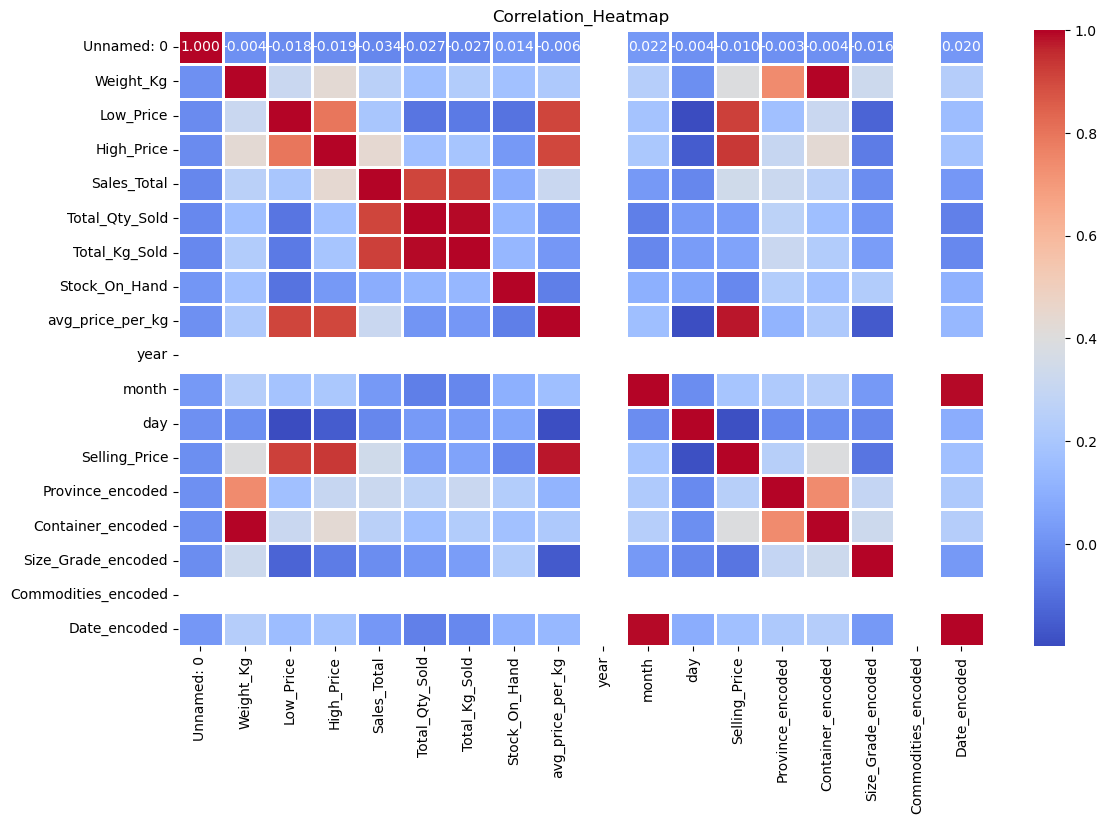

In [211]:
corr = df1.corr()

# Create heatmap with labels
plt.figure(figsize=(13, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.9,
            xticklabels=corr.columns, yticklabels=corr.index)
plt.title('Correlation_Heatmap')
plt.show()


In [212]:
df1.corr()[['avg_price_per_kg']].sort_values(by='avg_price_per_kg', ascending=False)

avg_price_per_kg
avg_price_per_kg             1.000000
Selling_Price                0.979457
Low_Price                    0.908843
High_Price                   0.902005
Sales_Total                  0.313387
Weight_Kg                    0.213510
Container_encoded            0.213510
month                        0.161662
Date_encoded                 0.134318
Province_encoded             0.118564
Total_Kg_Sold                0.018163
Total_Qty_Sold               0.007960
Unnamed: 0                  -0.005742
Stock_On_Hand               -0.055869
Size_Grade_encoded          -0.160389
day                         -0.190742
year                              NaN
Commodities_encoded               NaN

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Features Correlating with Selling_Price')

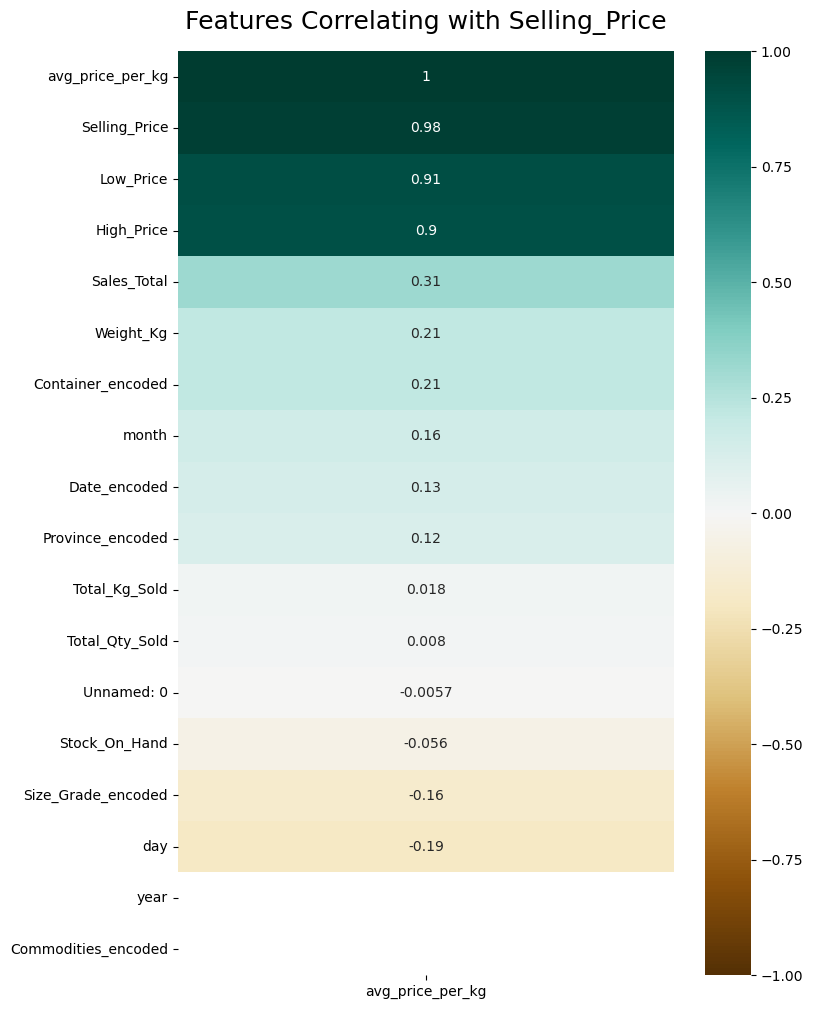

In [213]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df1.corr()[['avg_price_per_kg']].sort_values(by='avg_price_per_kg', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Selling_Price', fontdict={'fontsize':18}, pad=16)

In [214]:
# plt.figure(figsize=(13, 8))
# sns.pairplot(df1)

In [215]:
# from scipy import stats

# # Define threshold for identifying outliers (e.g., Z-score > 3 or < -3)
# threshold = 3

# # Calculate Z-score for each column
# z_scores = np.abs(stats.zscore(df1))

# # Create a boolean array indicating whether each value is an outlier
# outlier_mask = (z_scores > threshold).any(axis=1)

# # Remove rows containing outliers
# df1 = df1[~outlier_mask]
# df1


<Axes: xlabel='Weight_Kg'>

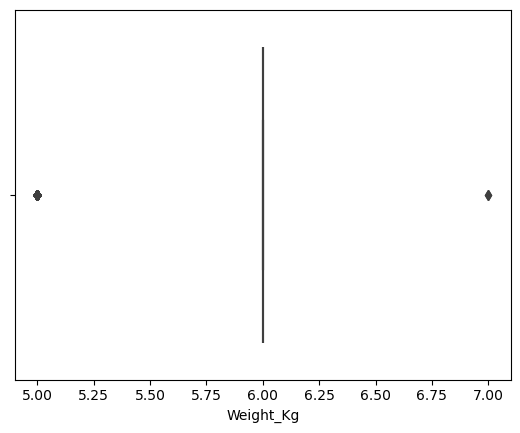

In [216]:
sns.boxplot(x=df1["Weight_Kg"])

In [217]:
#df1['avg_price_per_kg2'] = np.log(df1['avg_price_per_kg'])


<Axes: xlabel='avg_price_per_kg'>

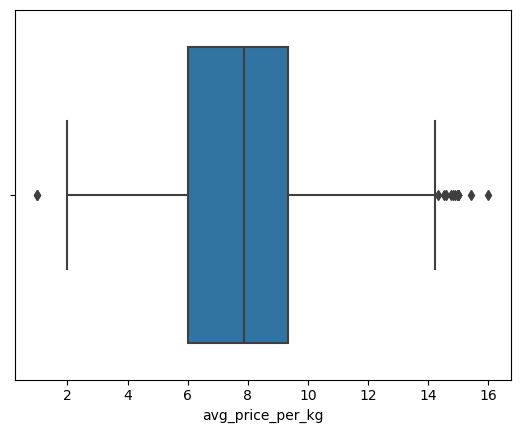

In [218]:
sns.boxplot(x=df1["avg_price_per_kg"])
#sns.boxplot(x=df1["avg_price_per_kg2"])

<Axes: xlabel='avg_price_per_kg'>

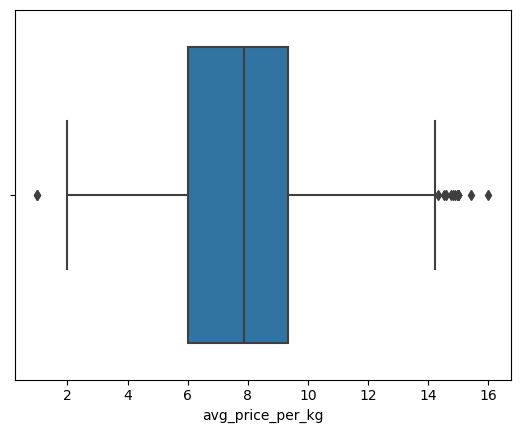

In [219]:
sns.boxplot(x=df1["avg_price_per_kg"])

<Axes: xlabel='High_Price'>

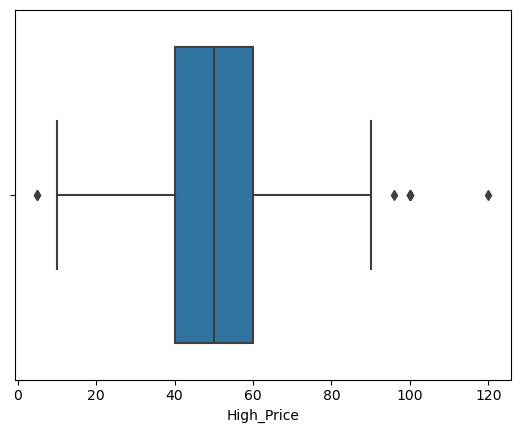

In [220]:
#gg2 = gg[gg['High_Price'] < 120]
sns.boxplot(x=df1["High_Price"])

In [221]:
df1.shape

(1283, 18)

<Axes: xlabel='Low_Price'>

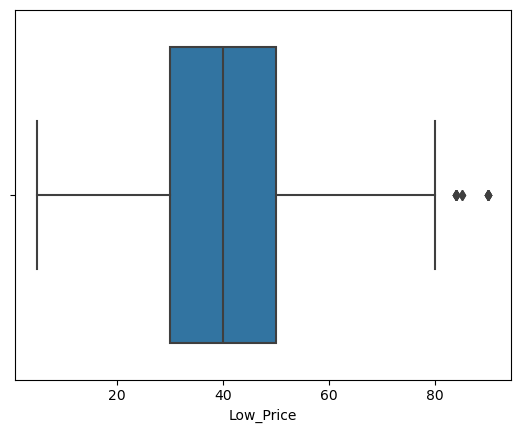

In [222]:
# gg = df1[df1['Low_Price'] < 100]
sns.boxplot(x=df1["Low_Price"])

<Axes: xlabel='Selling_Price'>

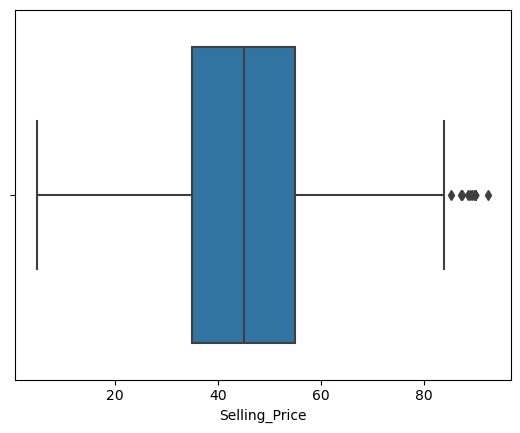

In [223]:
sns.boxplot(x=df1["Selling_Price"])

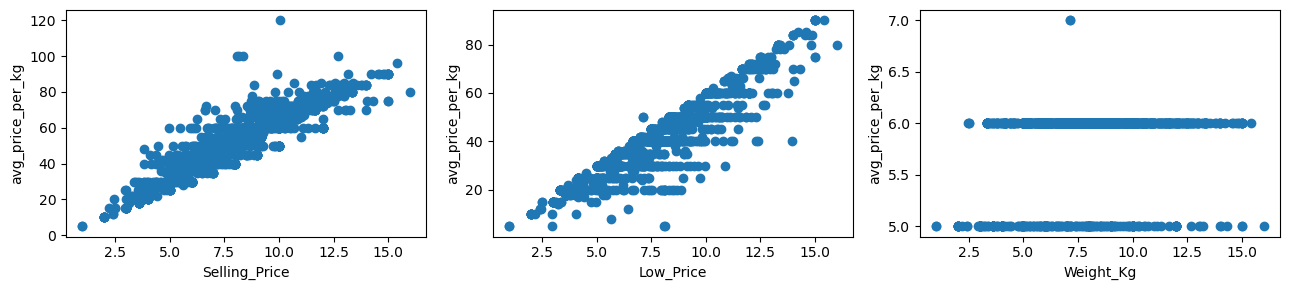

In [224]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 3))
gg2 = df1[df1['Container_encoded'] == 5]
ax[0].scatter(df1['avg_price_per_kg'], df1['High_Price'])
ax[0].set_xlabel('Selling_Price')
ax[0].set_ylabel('avg_price_per_kg')

ax[1].scatter(df1['avg_price_per_kg'], df1['Low_Price'])
ax[1].set_ylabel('avg_price_per_kg')
ax[1].set_xlabel('Low_Price')

ax[2].scatter(df1['avg_price_per_kg'], df1['Weight_Kg'])
ax[2].set_ylabel('avg_price_per_kg')
ax[2].set_xlabel('Weight_Kg')

plt.tight_layout()
plt.show()


In [225]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def backward_elimination_sklearn(X, y, n_features_to_select=None):
    # Create a linear regression model
    estimator = LinearRegression()
    
    # Initialize RFE
    selector = RFE(estimator, n_features_to_select=n_features_to_select, step=1)
    
    # Fit RFE
    selector = selector.fit(X, y)
    
    # Get selected features
    selected_features = X.columns[selector.support_]
    
    return selected_features


# Perform backward elimination
selected_features = backward_elimination_sklearn(X, y)

# Train your model with the selected features
X_selected = X[selected_features]
model = LinearRegression().fit(X_selected, y)

# Print selected features
print("Selected Features:", selected_features.tolist())

# Print model coefficients
print("Model Coefficients:", model.coef_)

Selected Features: ['Weight_Kg', 'Low_Price', 'month', 'Selling_Price', 'Province_encoded', 'Container_encoded', 'Size_Grade_encoded', 'Date_encoded']
Model Coefficients: [-0.64173876  0.0015298  -0.03034584  0.17266139  0.0497165  -0.64173876
 -0.00378743  0.00226437]


In [226]:
df1.head(2)

Unnamed: 0  Weight_Kg  Low_Price  High_Price  Sales_Total  \
52           52        5.0       35.0        50.0      15970.0   
108         108        6.0       45.0        45.0      14040.0   

     Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  year  \
52              453         2265.0            297              7.05  2020   
108             312         1872.0              0              7.50  2020   

     month  day  Selling_Price  Province_encoded  Container_encoded  \
52       2   14      35.253863                 5                  7   
108      2   22      45.000000                 6                  8   

     Size_Grade_encoded  Commodities_encoded  Date_encoded  
52                    0                    0            29  
108                  10                    0            33

['Province',
 'Container',
 'Size_Grade',
 'Commodities',
 'Weight_Kg',
 'Sales_Total',
 'Total_Kg_Sold',
 'Stock_On_Hand',
 'selling_price']

In [227]:
df1.drop(columns=['Unnamed: 0', 'Low_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand', 'year', 'day', 'Date_encoded','Selling_Price','Commodities_encoded'], inplace=True)

/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_9151/2779624203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['Unnamed: 0', 'Low_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand', 'year', 'day', 'Date_encoded','Selling_Price','Commodities_encoded'], inplace=True)


In [228]:
X

Unnamed: 0  Weight_Kg  Low_Price  High_Price  Sales_Total  \
52             52        5.0       35.0        50.0      15970.0   
108           108        6.0       45.0        45.0      14040.0   
131           131        6.0       40.0        50.0      35985.0   
167           167        5.0       20.0        20.0       1140.0   
173           173        6.0       50.0        72.0       9758.0   
...           ...        ...        ...         ...          ...   
64032       64032        6.0       20.0        22.0       6440.0   
64097       64097        6.0       22.0        45.0      25162.0   
64132       64132        6.0       70.0        84.0      37501.0   
64284       64284        6.0       55.0        65.0      17820.0   
64365       64365        6.0       30.0        35.0      16570.0   

       Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  year  month  day  \
52                453         2265.0            297  2020      2   14   
108               312         1872.0              0  2020      2   22   
131               789         4734.0            453  2020      8   18   
167                57          285.0              0  2020      1   14   
173               156          936.0              0  2020      2    1   
...               ...            ...            ...   ...    ...  ...   
64032             316         1896.0            468  2020      8   25   
64097            1025         6150.0            170  2020      7   18   
64132             506         3036.0            360  2020      5    6   
64284             312         1872.0              0  2020      6    3   
64365             518         3108.0            332  2020      1    8   

       Selling_Price  Province_encoded  Container_encoded  Size_Grade_encoded  \
52         35.253863                 5                  7                   0   
108        45.000000                 6                  8                  10   
131        45.608365                 6                  8                   1   
167        20.000000                 5                  7                   3   
173        62.551282                 6                  8                   1   
...              ...               ...                ...                 ...   
64032      20.379747                 6                  8                  15   
64097      24.548293                 6                  8                  14   
64132      74.112648                 6                  8                   1   
64284      57.115385                 6                  8                   2   
64365      31.988417                 6                  8                  18   

       Commodities_encoded  Date_encoded  
52                       0            29  
108                      0            33  
131                      0           125  
167                      0            13  
173                      0            21  
...                    ...           ...  
64032                    0           129  
64097                    0           105  
64132                    0            68  
64284                    0            82  
64365                    0             8  

[1283 rows x 17 columns]

In [229]:
X = df1.drop(columns=['avg_price_per_kg'])  
y = df1['avg_price_per_kg']  

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# Step 2: Model Creation
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Step 3: Model Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 0.8019275757295264
Root Mean Squared Error: 0.8955040902919017
Mean Absolute Error: 0.6792719178516636
R-squared: 0.8797120049344561


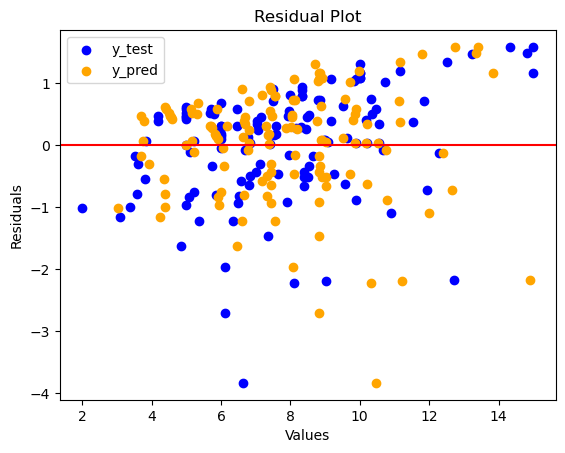

In [231]:
residuals = y_test - y_pred

# Scatter plot of residuals for y_test
plt.scatter(y_test, residuals, color='blue', label='y_test')
# Scatter plot of residuals for y_pred
plt.scatter(y_pred, residuals, color='orange', label='y_pred')

plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel("Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()

In [232]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

# Define the range of alpha values to search
alphas = np.logspace(-4, 4, 9)  # Example range of alpha values

# Set up the parameter grid for Lasso and Ridge regression
param_grid_lasso = {'alpha': alphas}
param_grid_ridge = {'alpha': alphas}

# Initialize GridSearchCV for Lasso and Ridge regression
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV objects to the training data
grid_search_lasso.fit(X_train, y_train)
grid_search_ridge.fit(X_train, y_train)

# Get the best alpha values
best_alpha_lasso = grid_search_lasso.best_params_['alpha']
best_alpha_ridge = grid_search_ridge.best_params_['alpha']

print("Best alpha for Lasso:", best_alpha_lasso)
print("Best alpha for Ridge:", best_alpha_ridge)

# Initialize Lasso and Ridge regression models with the best alpha values
lasso_model = Lasso(alpha=best_alpha_lasso)
ridge_model = Ridge(alpha=best_alpha_ridge)

# Fit the models to the training data
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set for Lasso regression
y_pred_lasso = lasso_model.predict(X_test)

# Make predictions on the test set for Ridge regression
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the models for Lasso regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Evaluate the models for Ridge regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Lasso Regression:")
print("Mean Squared Error:", mse_lasso)
print("Root Mean Squared Error:", rmse_lasso)
print("Mean Absolute Error:", mae_lasso)
print("R-squared:", r2_lasso)
print()

print("Ridge Regression:")
print("Mean Squared Error:", mse_ridge)
print("Root Mean Squared Error:", rmse_ridge)
print("Mean Absolute Error:", mae_ridge)
print("R-squared:", r2_ridge)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.177e+02, tolerance: 6.131e-01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.590e+02, tolerance: 6.019e-01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.468e+02, toler

Best alpha for Lasso: 0.001
Best alpha for Ridge: 1.0
Lasso Regression:
Mean Squared Error: 0.8023971413892703
Root Mean Squared Error: 0.8957662314405864
Mean Absolute Error: 0.6794280807051607
R-squared: 0.8796415707537748

Ridge Regression:
Mean Squared Error: 0.801990016276158
Root Mean Squared Error: 0.8955389529641679
Mean Absolute Error: 0.6792857770199839
R-squared: 0.8797026389413259


In [233]:
from sklearn.linear_model import Lasso, Ridge

# Step 2: Model Creation
# Initialize the Lasso regression model
lasso_model = Lasso(alpha=0.0001)  # You can adjust the alpha value

# Initialize the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value

# Fit the models to the training data
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Step 3: Model Evaluation
# Make predictions on the test set for Lasso regression
y_pred_lasso = lasso_model.predict(X_test)

# Make predictions on the test set for Ridge regression
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the models for Lasso regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Evaluate the models for Ridge regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Lasso Regression:")
print("Mean Squared Error:", mse_lasso)
print("Root Mean Squared Error:", rmse_lasso)
print("Mean Absolute Error:", mae_lasso)
print("R-squared:", r2_lasso)
print()

print("Ridge Regression:")
print("Mean Squared Error:", mse_ridge)
print("Root Mean Squared Error:", rmse_ridge)
print("Mean Absolute Error:", mae_ridge)
print("R-squared:", r2_ridge)

Lasso Regression:
Mean Squared Error: 0.802016559658964
Root Mean Squared Error: 0.8955537726228191
Mean Absolute Error: 0.6793024536712083
R-squared: 0.8796986574716813

Ridge Regression:
Mean Squared Error: 0.801990016276158
Root Mean Squared Error: 0.8955389529641679
Mean Absolute Error: 0.6792857770199839
R-squared: 0.8797026389413259


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.355e+02, tolerance: 7.589e-01
  model = cd_fast.enet_coordinate_descent(


In [234]:
from sklearn.linear_model import Lasso, Ridge

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
linear_model = LinearRegression()
# Fit the Linear Regression model to the training data
linear_model.fit(X_train, y_train)

# Initialize the Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value
# Fit the Lasso regression model to the training data
lasso_model.fit(X_train, y_train)

# Initialize the Ridge regression model
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha value
# Fit the Ridge regression model to the training data
ridge_model.fit(X_train, y_train)

# Get the coefficients for Linear Regression model
linear_coefs = linear_model.coef_

# Get the coefficients for Lasso regression model
lasso_coefs = lasso_model.coef_

# Get the coefficients for Ridge regression model
ridge_coefs = ridge_model.coef_

# Compare the coefficients
print("Linear Regression Coefficients:", linear_coefs)
print("Lasso Regression Coefficients:", lasso_coefs)
print("Ridge Regression Coefficients:", ridge_coefs)


Linear Regression Coefficients: [-0.53767202  0.14865169  0.01312277 -0.25580863 -0.53767202 -0.00966299]
Lasso Regression Coefficients: [-0.01913534  0.13908879 -0.         -0.23759986 -0.2230772  -0.03012051]
Ridge Regression Coefficients: [-0.5373094   0.14864606  0.01311383 -0.25601829 -0.5373094  -0.00967649]


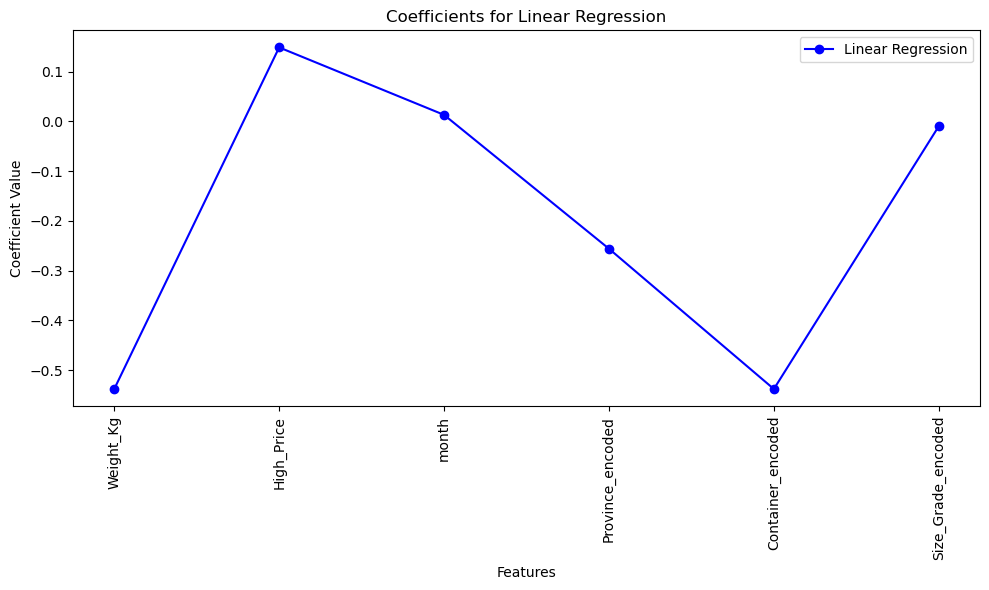

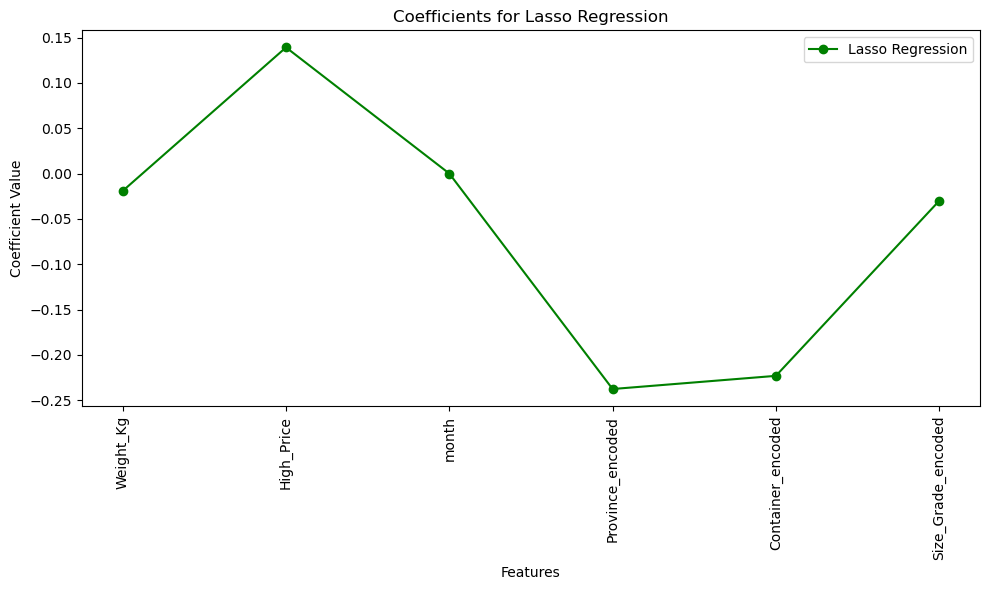

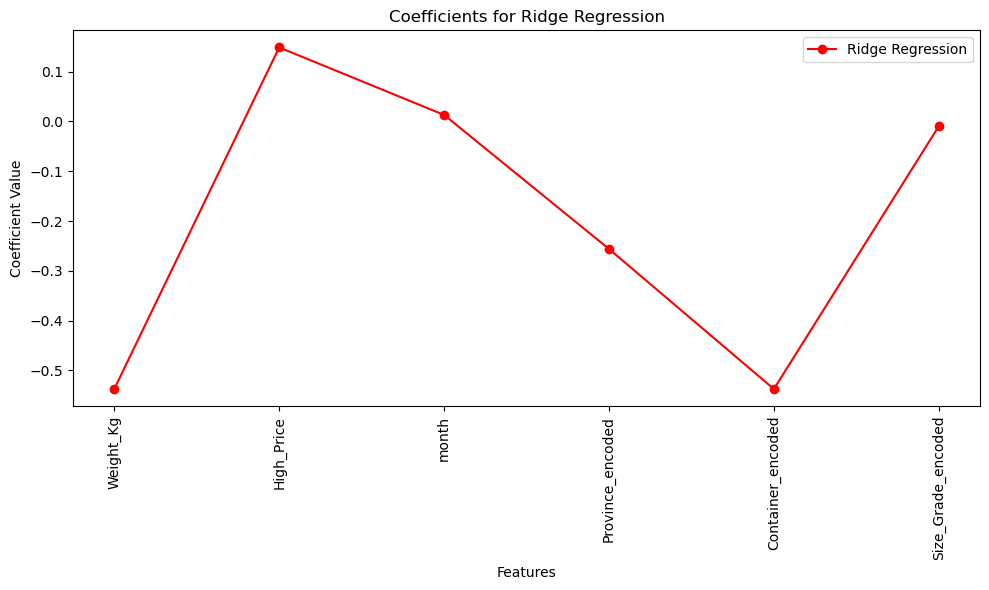

In [235]:
import matplotlib.pyplot as plt

# Get feature names
feature_names = X.columns

# Plotting coefficients for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(range(len(feature_names)), linear_coefs, marker='o', label='Linear Regression', color='blue')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.title('Coefficients for Linear Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting coefficients for Lasso Regression
plt.figure(figsize=(10, 6))
plt.plot(range(len(feature_names)), lasso_coefs, marker='o', label='Lasso Regression', color='green')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.title('Coefficients for Lasso Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting coefficients for Ridge Regression
plt.figure(figsize=(10, 6))
plt.plot(range(len(feature_names)), ridge_coefs, marker='o', label='Ridge Regression', color='red')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.title('Coefficients for Ridge Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend()
plt.tight_layout()
plt.show()


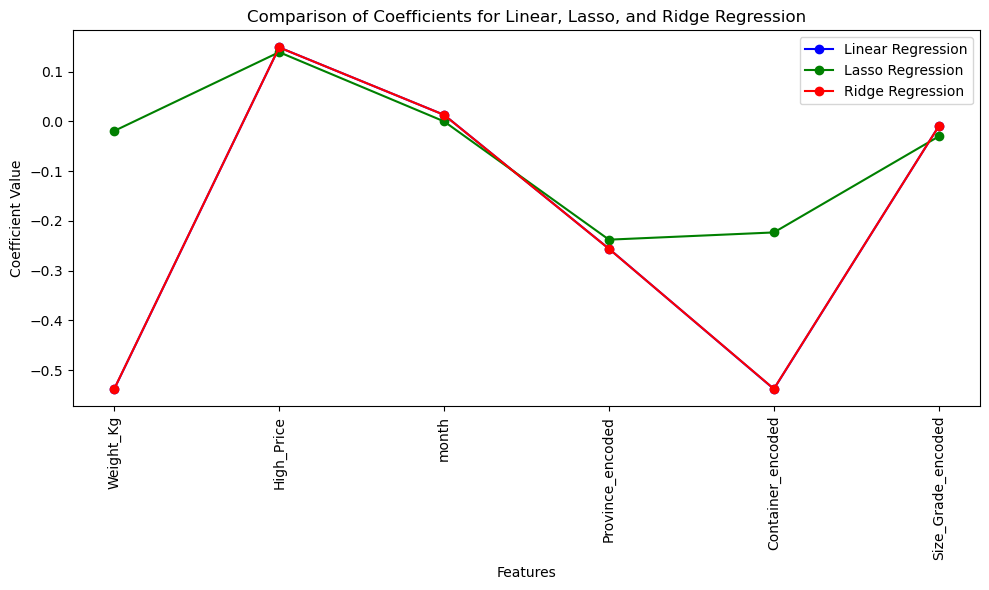

In [236]:
import matplotlib.pyplot as plt

# Get feature names
feature_names = X.columns

# Plotting coefficients for all models
plt.figure(figsize=(10, 6))

# Linear Regression
plt.plot(range(len(feature_names)), linear_coefs, marker='o', label='Linear Regression', color='blue')

# Lasso Regression
plt.plot(range(len(feature_names)), lasso_coefs, marker='o', label='Lasso Regression', color='green')

# Ridge Regression
plt.plot(range(len(feature_names)), ridge_coefs, marker='o', label='Ridge Regression', color='red')

plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.title('Comparison of Coefficients for Linear, Lasso, and Ridge Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend()
plt.tight_layout()
plt.show()


In [237]:
# from scipy.stats import linregress


# slope, intercept, _, _, _ = linregress(y_test, residuals)
# best_fit_line = slope * y_test + intercept

# # Scatter plot of residuals with best fit line
# plt.scatter(y_test, residuals)
# plt.plot(y_test, best_fit_line, color='r')
# plt.xlabel("Actual Values")
# plt.ylabel("Residuals")
# plt.title("Residual Plot with Best Fit Line")
# plt.show()


In [238]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [239]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [240]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor

# Splitting data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred_val = dt.predict(X_val)
dt_pred_test = dt.predict(X_test)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred_val = rf.predict(X_val)
rf_pred_test = rf.predict(X_test)

# XGBoost
xgboost = xgb.XGBRegressor()
xgboost.fit(X_train, y_train)
xgboost_pred_val = xgboost.predict(X_val)
xgboost_pred_test = xgboost.predict(X_test)

# CatBoost
catboost = CatBoostRegressor()
catboost.fit(X_train, y_train)
catboost_pred_val = catboost.predict(X_val)
catboost_pred_test = catboost.predict(X_test)

# Evaluation Metrics for Validation Set
def evaluate_model_val(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, rmse, mse, mae

dt_metrics_val = evaluate_model_val(y_val, dt_pred_val)
rf_metrics_val = evaluate_model_val(y_val, rf_pred_val)
xgboost_metrics_val = evaluate_model_val(y_val, xgboost_pred_val)
catboost_metrics_val = evaluate_model_val(y_val, catboost_pred_val)

# Evaluation Metrics for Test Set
def evaluate_model_test(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, rmse, mse, mae

dt_metrics_test = evaluate_model_test(y_test, dt_pred_test)
rf_metrics_test = evaluate_model_test(y_test, rf_pred_test)
xgboost_metrics_test = evaluate_model_test(y_test, xgboost_pred_test)
catboost_metrics_test = evaluate_model_test(y_test, catboost_pred_test)

# Print Validation Metrics
print("Validation Metrics:")
print("Decision Tree Metrics (R^2, RMSE, MSE, MAE):", dt_metrics_val)
print("Random Forest Metrics (R^2, RMSE, MSE, MAE):", rf_metrics_val)
print("XGBoost Metrics (R^2, RMSE, MSE, MAE):", xgboost_metrics_val)
print("CatBoost Metrics (R^2, RMSE, MSE, MAE):", catboost_metrics_val)

# Print Test Metrics
print("\nTest Metrics:")
print("Decision Tree Metrics (R^2, RMSE, MSE, MAE):", dt_metrics_test)
print("Random Forest Metrics (R^2, RMSE, MSE, MAE):", rf_metrics_test)
print("XGBoost Metrics (R^2, RMSE, MSE, MAE):", xgboost_metrics_test)
print("CatBoost Metrics (R^2, RMSE, MSE, MAE):", catboost_metrics_test)


Learning rate set to 0.040253
0:	learn: 2.5014692	total: 4.43ms	remaining: 4.43s
1:	learn: 2.4339844	total: 4.66ms	remaining: 2.33s
2:	learn: 2.3677715	total: 4.83ms	remaining: 1.61s
3:	learn: 2.3015803	total: 5.16ms	remaining: 1.28s
4:	learn: 2.2373859	total: 5.4ms	remaining: 1.07s
5:	learn: 2.1723781	total: 5.62ms	remaining: 932ms
6:	learn: 2.1204089	total: 5.84ms	remaining: 829ms
7:	learn: 2.0676793	total: 6.05ms	remaining: 750ms
8:	learn: 2.0199392	total: 6.25ms	remaining: 688ms
9:	learn: 1.9669980	total: 6.6ms	remaining: 654ms
10:	learn: 1.9174576	total: 7.07ms	remaining: 636ms
11:	learn: 1.8713781	total: 7.22ms	remaining: 594ms
12:	learn: 1.8269576	total: 7.45ms	remaining: 566ms
13:	learn: 1.7827036	total: 7.66ms	remaining: 540ms
14:	learn: 1.7449411	total: 7.81ms	remaining: 513ms
15:	learn: 1.7038068	total: 8.03ms	remaining: 494ms
16:	learn: 1.6690482	total: 8.2ms	remaining: 474ms
17:	learn: 1.6331555	total: 8.44ms	remaining: 460ms
18:	learn: 1.6008181	total: 8.6ms	remaining: 44

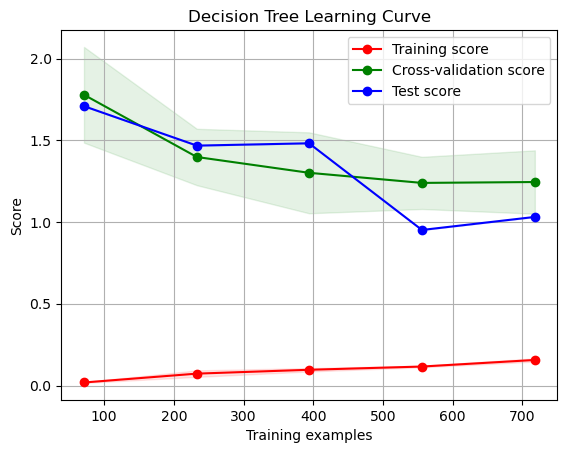

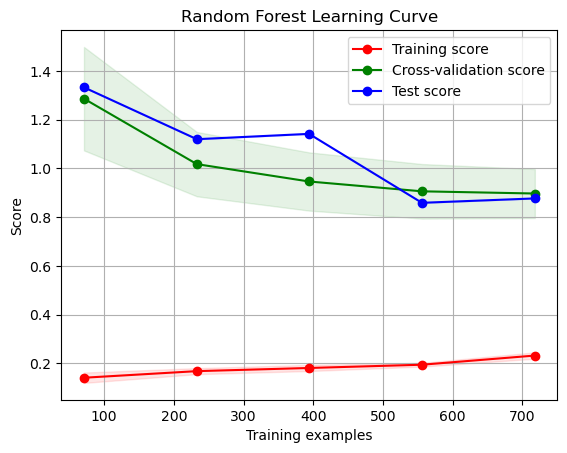

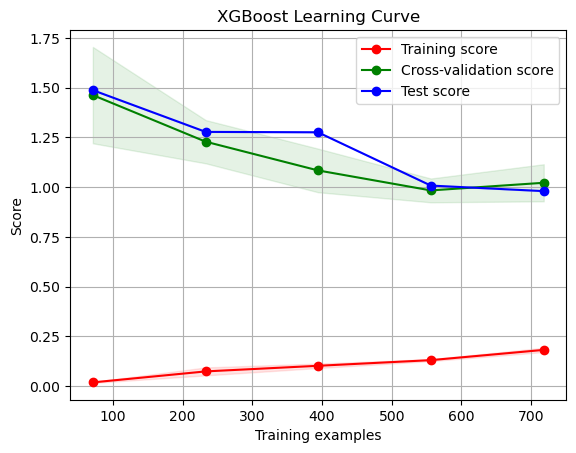

Learning rate set to 0.026957
0:	learn: 2.6029761	total: 292us	remaining: 292ms
1:	learn: 2.5689859	total: 692us	remaining: 345ms
2:	learn: 2.5352263	total: 1.01ms	remaining: 335ms
3:	learn: 2.5100525	total: 1.14ms	remaining: 285ms
4:	learn: 2.4815704	total: 1.2ms	remaining: 238ms
5:	learn: 2.4529630	total: 1.25ms	remaining: 207ms
6:	learn: 2.4245796	total: 1.31ms	remaining: 186ms
7:	learn: 2.3904420	total: 1.38ms	remaining: 171ms
8:	learn: 2.3590916	total: 1.46ms	remaining: 160ms
9:	learn: 2.3317099	total: 1.89ms	remaining: 188ms
10:	learn: 2.3084520	total: 2.03ms	remaining: 182ms
11:	learn: 2.2800926	total: 2.1ms	remaining: 173ms
12:	learn: 2.2508216	total: 2.19ms	remaining: 167ms
13:	learn: 2.2291596	total: 2.27ms	remaining: 160ms
14:	learn: 2.2031628	total: 2.34ms	remaining: 154ms
15:	learn: 2.1727726	total: 2.52ms	remaining: 155ms
16:	learn: 2.1438055	total: 2.63ms	remaining: 152ms
17:	learn: 2.1216498	total: 2.71ms	remaining: 148ms
18:	learn: 2.0947586	total: 2.73ms	remaining: 14

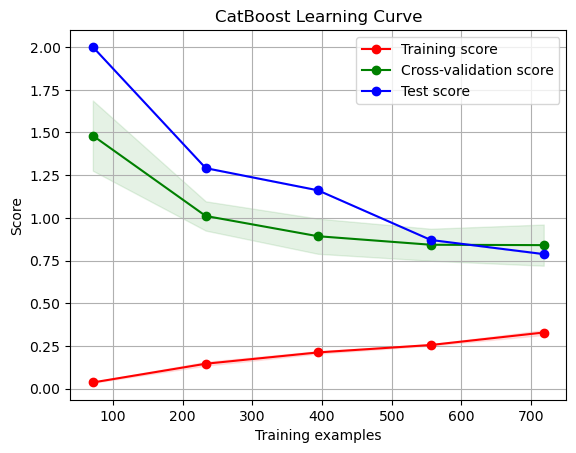

In [241]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves
def plot_learning_curve(train_sizes, train_scores_mean, train_scores_std, 
                        val_scores_mean, val_scores_std, test_scores_mean=None, test_scores_std=None,
                        title="Learning Curve", ylim=None):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    if test_scores_mean is not None:
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="b")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
                 label="Test score")
    plt.legend(loc="best")
    return plt

# Define a function to compute test scores
def compute_test_scores(estimator, X_train, y_train, X_test, y_test):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X_train, y_train, cv=5,
                                                            train_sizes=np.linspace(0.1, 1.0, 5),
                                                            scoring="neg_mean_squared_error")
    test_scores = []
    for train_size, train_score in zip(train_sizes, train_scores):
        estimator.fit(X_train[:int(train_size)], y_train[:int(train_size)])
        test_score = mean_squared_error(y_test, estimator.predict(X_test))
        test_scores.append(test_score)
    return train_sizes, np.array(test_scores), np.zeros(len(test_scores))  # Standard deviation not applicable for single scores


# Decision Tree Learning Curve
dt_train_sizes, dt_train_scores, dt_val_scores = learning_curve(dt, X_train, y_train, cv=5,
                                                                train_sizes=np.linspace(0.1, 1.0, 5),
                                                                scoring="neg_mean_squared_error")
dt_test_sizes, dt_test_scores_mean, dt_test_scores_std = compute_test_scores(dt, X_train, y_train, X_test, y_test)
plot_learning_curve(dt_train_sizes, -dt_train_scores.mean(axis=1), dt_train_scores.std(axis=1),
                    -dt_val_scores.mean(axis=1), dt_val_scores.std(axis=1),
                    dt_test_scores_mean, dt_test_scores_std,
                    title="Decision Tree Learning Curve")
plt.show()

# Random Forest Learning Curve
rf_train_sizes, rf_train_scores, rf_val_scores = learning_curve(rf, X_train, y_train, cv=5,
                                                                train_sizes=np.linspace(0.1, 1.0, 5),
                                                                scoring="neg_mean_squared_error")
rf_test_sizes, rf_test_scores_mean, rf_test_scores_std = compute_test_scores(rf, X_train, y_train, X_test, y_test)
plot_learning_curve(rf_train_sizes, -rf_train_scores.mean(axis=1), rf_train_scores.std(axis=1),
                    -rf_val_scores.mean(axis=1), rf_val_scores.std(axis=1),
                    rf_test_scores_mean, rf_test_scores_std,
                    title="Random Forest Learning Curve")
plt.show()

# XGBoost Learning Curve
xgboost_train_sizes, xgboost_train_scores, xgboost_val_scores = learning_curve(xgboost, X_train, y_train, cv=5,
                                                                                train_sizes=np.linspace(0.1, 1.0, 5),
                                                                                scoring="neg_mean_squared_error")
xgboost_test_sizes, xgboost_test_scores_mean, xgboost_test_scores_std = compute_test_scores(xgboost, X_train, y_train, X_test, y_test)
plot_learning_curve(xgboost_train_sizes, -xgboost_train_scores.mean(axis=1), xgboost_train_scores.std(axis=1),
                    -xgboost_val_scores.mean(axis=1), xgboost_val_scores.std(axis=1),
                    xgboost_test_scores_mean, xgboost_test_scores_std,
                    title="XGBoost Learning Curve")
plt.show()

# CatBoost Learning Curve
catboost_train_sizes, catboost_train_scores, catboost_val_scores = learning_curve(catboost, X_train, y_train, cv=5,
                                                                                   train_sizes=np.linspace(0.1, 1.0, 5),
                                                                                   scoring="neg_mean_squared_error")
catboost_test_sizes, catboost_test_scores_mean, catboost_test_scores_std = compute_test_scores(catboost, X_train, y_train, X_test, y_test)
plot_learning_curve(catboost_train_sizes, -catboost_train_scores.mean(axis=1), catboost_train_scores.std(axis=1),
                    -catboost_val_scores.mean(axis=1), catboost_val_scores.std(axis=1),
                    catboost_test_scores_mean, catboost_test_scores_std,
                    title="CatBoost Learning Curve")
plt.show()



In [242]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def backward_elimination_sklearn(X, y, n_features_to_select=None):
    # Create a linear regression model
    estimator = LinearRegression()
    
    # Initialize RFE
    selector = RFE(estimator, n_features_to_select=n_features_to_select, step=1)
    
    # Fit RFE
    selector = selector.fit(X, y)
    
    # Get selected features
    selected_features = X.columns[selector.support_]
    
    return selected_features

# Example usage
# X is your feature matrix, y is your target variable
# X should be a DataFrame with all the features
# y should be a Series with the target variable

# Perform backward elimination
selected_features = backward_elimination_sklearn(X, y)

# Train your model with the selected features
X_selected = X[selected_features]
model = LinearRegression().fit(X_selected, y)

# Print selected features
print("Selected Features:", selected_features.tolist())

# Print model coefficients
print("Model Coefficients:", model.coef_)


Selected Features: ['Weight_Kg', 'Province_encoded', 'Container_encoded']
Model Coefficients: [ 6.23964264e+12 -3.91601562e-01 -6.23964264e+12]
